In [1]:
#import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_theme(style='darkgrid')

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)

In [24]:
# upload and check on data
df = pd.read_csv('movies.csv')
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [25]:
pd.set_option('display.max_rows',None)

In [26]:
#insights about our data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [54]:
#change d-type of gross and budget
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')


In [31]:
#check missing data 
df.isna().sum()


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [18]:
# Adjusting the year column to get along with the released column
# Extract the year using a regular expression
df['year'] = df['released'].str.extract(r',\s*(\d{4})\s*\(') # or df['released'].str.split(',').str[1].str[1:5]
df['year'].head(3)

0    1980
1    1980
2    1980
Name: year, dtype: object

In [19]:
df.sort_values(by=['gross'], inplace=False).head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,0,0,PK 65 Films,102.0
980,Malcolm,PG-13,Comedy,1986,"November 5, 1986 (United States)",7.1,2100.0,Nadia Tass,David Parker,Colin Friels,Australia,0,0,Cascade Films,85.0
261,Frances,R,Biography,1983,"March 11, 1983 (Australia)",7.3,7300.0,Graeme Clifford,Eric Bergren,Jessica Lange,United States,0,0,Brooksfilms,140.0
1822,The Shrimp on the Barbie,PG-13,Comedy,1990,"August 31, 1990 (United States)",5.7,1200.0,Director,Grant Morris,Cheech Marin,Australia,0,0,Unity Pictures,90.0
460,Young Warriors,R,Action,1983,"August 28, 1983 (United States)",4.7,460.0,Lawrence David Foldes,Russell W. Colgin,Ernest Borgnine,United States,0,0,Star Cinema,105.0


#Budget per movie-type


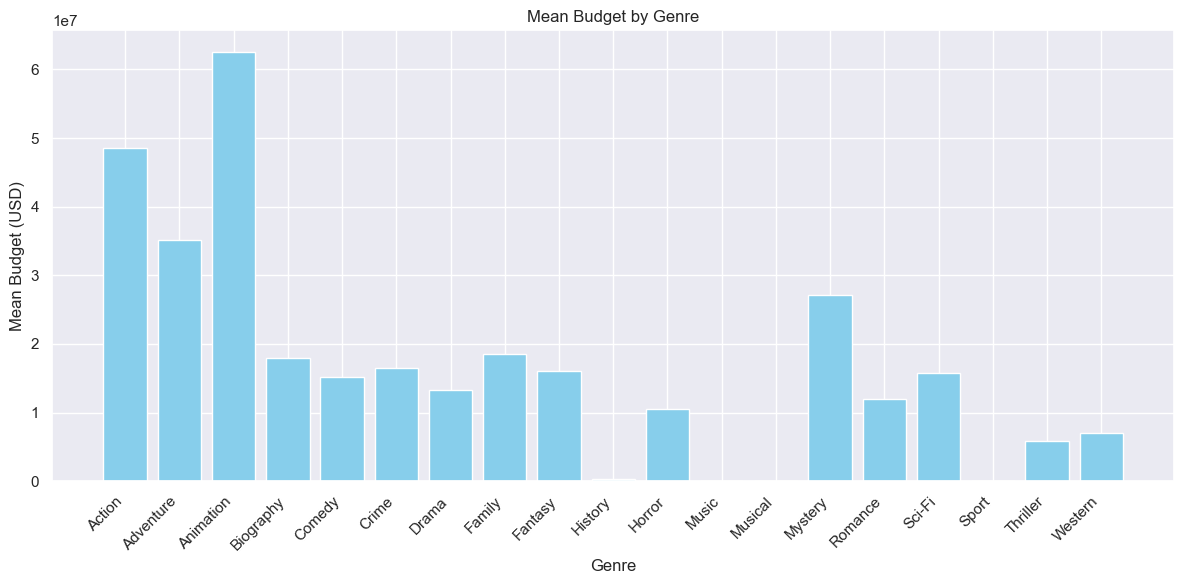

In [128]:
mean_bedg_genre = df.groupby('genre')['budget'].mean()
# plt.hist(mean_bedg_genre)
plt.bar(mean_bedg_genre.index, mean_bedg_genre.values, color='skyblue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Genre')
plt.ylabel('Mean Budget (USD)')
plt.title('Mean Budget by Genre')
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


#Revenue per movie-type

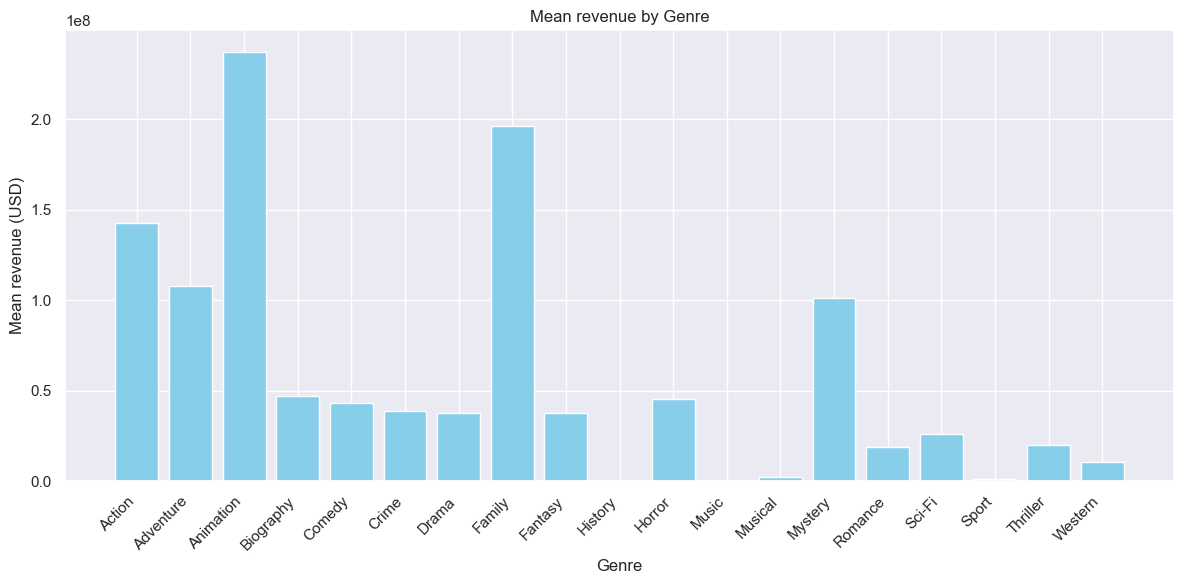

In [129]:
mean_revenue_genre = df.groupby('genre')['gross'].mean()
# plt.hist(mean_bedg_genre)
plt.bar(mean_revenue_genre.index, mean_revenue_genre.values, color='skyblue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Genre')
plt.ylabel('Mean revenue (USD)')
plt.title('Mean revenue by Genre')
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


#Genre trends in 2020

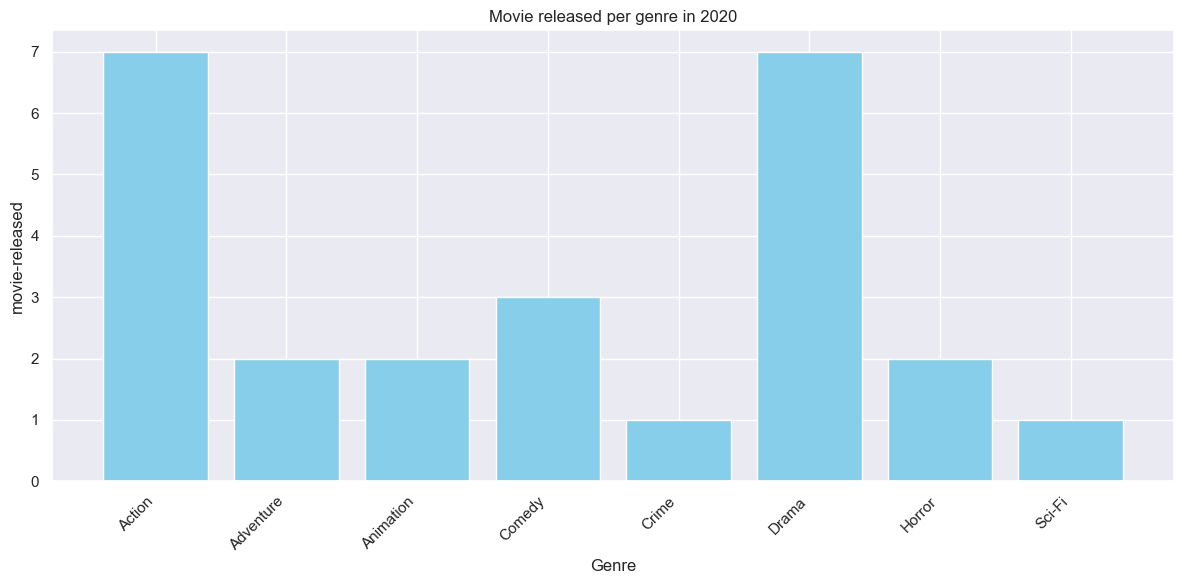

In [139]:
data = df[df['year'].isin(df['year'].nlargest(10))].groupby(['year', 'genre']).size().reset_index(name='count')
plt.bar(data['genre'],data['count'],color='skyblue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Genre')
plt.ylabel('movie-released')
plt.title('Movie released per genre in 2020')
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

### #Correlation check with Gross

#Budget vs Gross

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7609 non-null   object 
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   Int64  
 12  gross     7479 non-null   Int64  
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: Int64(2), float64(3), object(10)
memory usage: 913.7+ KB


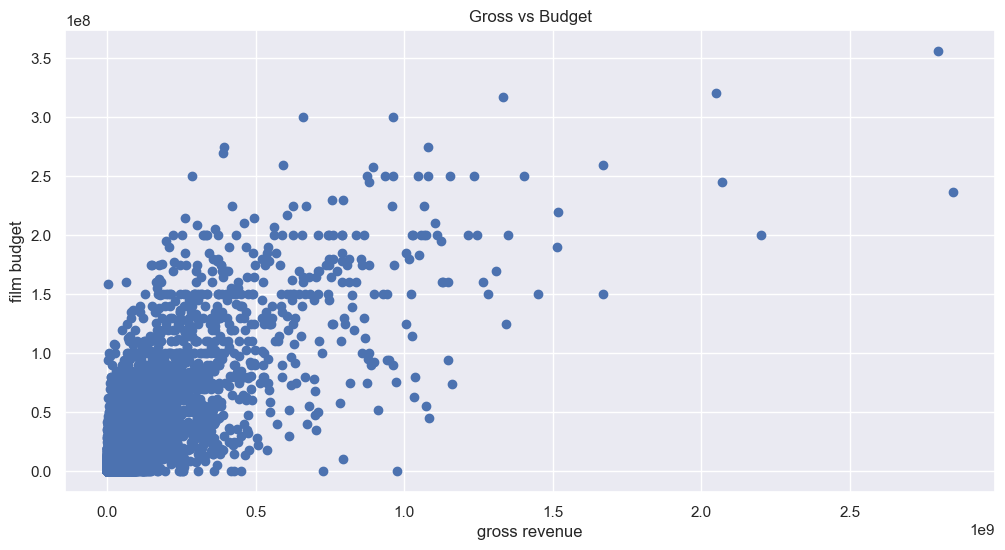

In [55]:
plt.scatter(x=df['gross'],y=df['budget'] )
plt.xlabel('gross revenue')
plt.ylabel('film budget')
plt.title("Gross vs Budget")
plt.show()

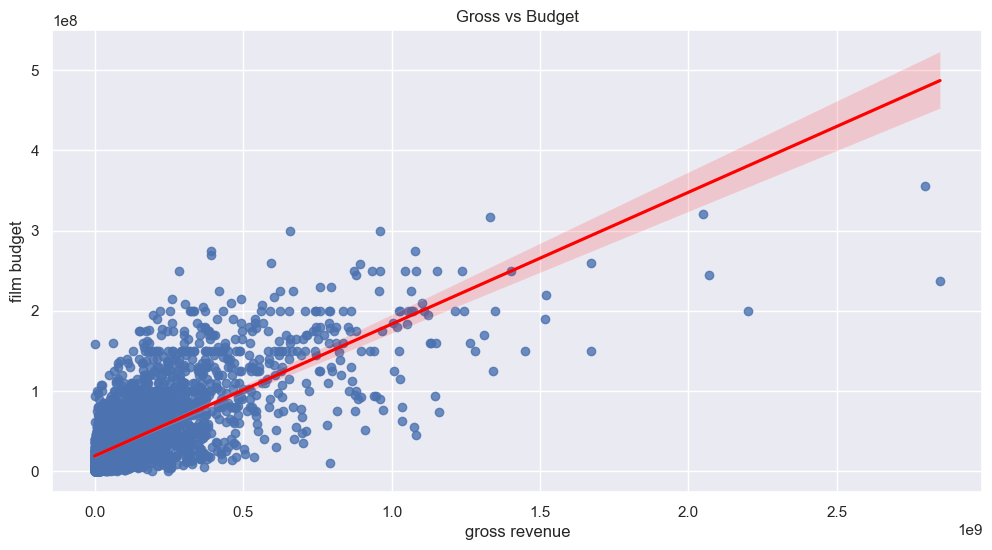

In [56]:
sns.regplot(x='gross', y='budget', data= df_notnan_budget,line_kws={'color':'red'})
plt.xlabel('gross revenue')
plt.ylabel('film budget')
plt.title("Gross vs Budget")
plt.show()

In [57]:
corr_matrix = df.corr()  #mehtode = {default= pearson, kendall, spearman}
corr_matrix

C:\Users\aaa\AppData\Local\Temp\ipykernel_14916\3413045144.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()  #mehtode = {default= pearson, kendall, spearman}


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


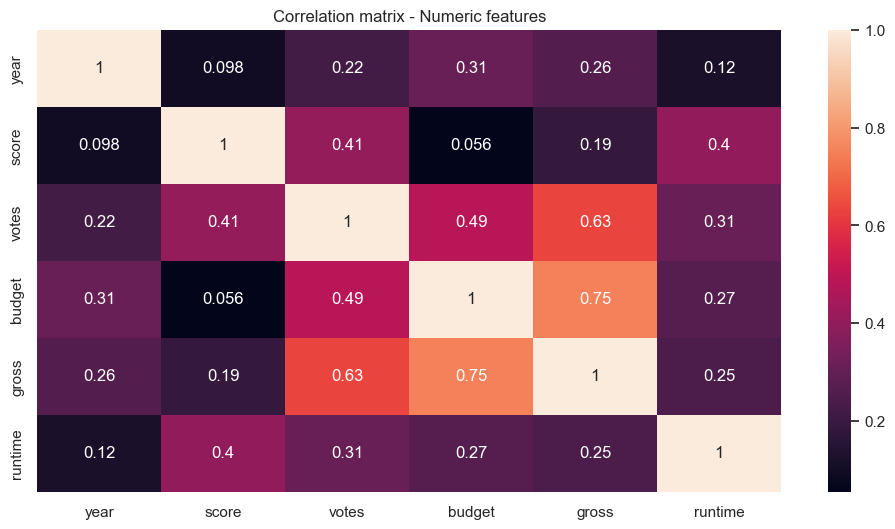

In [58]:
sns.heatmap(corr_matrix,  annot=True)
plt.title("Correlation matrix - Numeric features")
plt.show()

#Gross vs Company 

In [74]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,company-id,director-id,writer-id,country-id
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,0,0,0,0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1,1,1,1
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,2,2,2,1
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,3,3,3,1
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,4,4,4,1


In [77]:
#columns into numeric values
columns =  ['star','director', 'writer','country']
for col in columns :
    unique = df[col].unique()
    df['-'.join([col,'id'])] = df[col].replace(unique,list(range(len(unique)))).astype('Int64')

C:\Users\aaa\AppData\Local\Temp\ipykernel_14916\2110048984.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


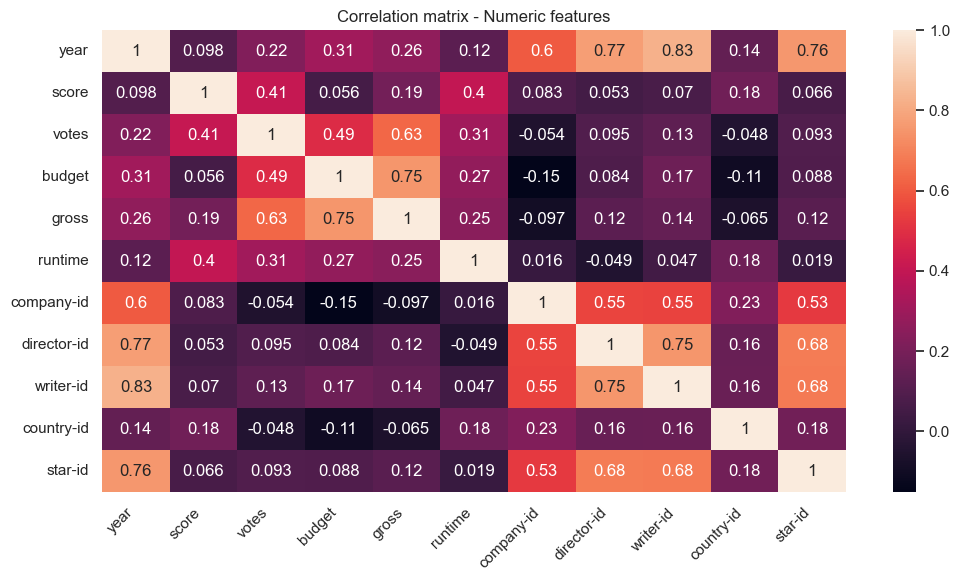

In [79]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,  annot=True)
plt.title("Correlation matrix - Numeric features")
plt.xticks(rotation=45, ha='right')
plt.show()

In [113]:
corr_pairs = corr_matrix.unstack()
corr_pairs[(corr_pairs > 0.5) & (corr_pairs != 1) & (corr_pairs != np.nan)].sort_values(ascending=False)



year         writer-id      0.825351
writer-id    year           0.825351
director-id  year           0.770497
year         director-id    0.770497
             star-id        0.756341
star-id      year           0.756341
budget       gross          0.750157
gross        budget         0.750157
director-id  writer-id      0.748875
writer-id    director-id    0.748875
star-id      director-id    0.682358
director-id  star-id        0.682358
writer-id    star-id        0.676284
star-id      writer-id      0.676284
gross        votes          0.632834
votes        gross          0.632834
company-id   year           0.601720
year         company-id     0.601720
director-id  company-id     0.552420
company-id   director-id    0.552420
             writer-id      0.547126
writer-id    company-id     0.547126
company-id   star-id        0.527363
star-id      company-id     0.527363
dtype: float64